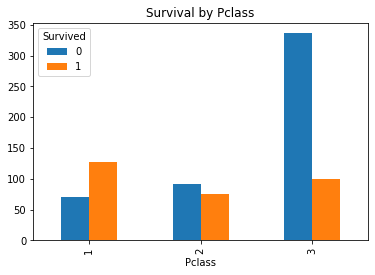

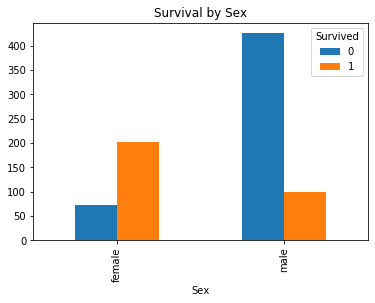

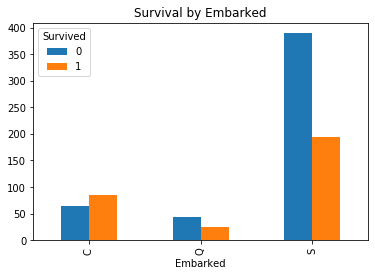

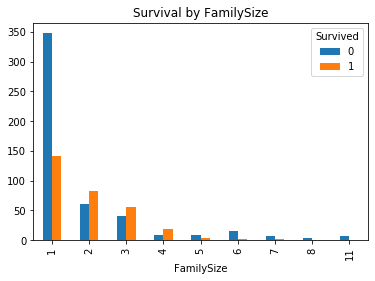

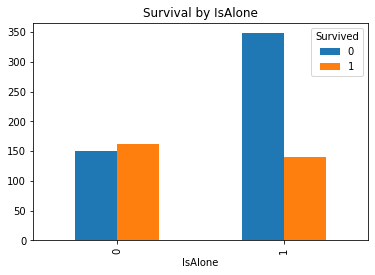

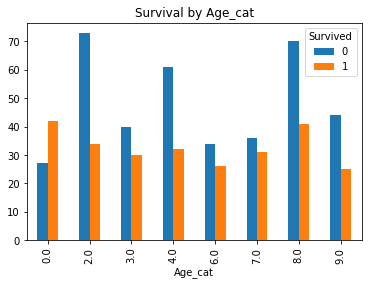

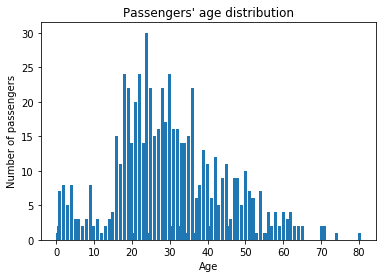

In [69]:
import pandas as pd
import matplotlib.pyplot as plt

def catregorize_age(age):
    if age < 16:
        return 0
    if age < 22:
        return 2
    if age < 25:
        return 3
    if age < 30:
        return 4
    if age < 33:
        return 6
    if age < 37:
        return 7
    if age < 50:
        return 8
    if age < 85:
        return 9

#Read in the data into a DataFrame
df = pd.read_csv("../data/train.csv", sep = ";")

#Record the target variable
target = df["Survived"]

#Perform bucketization on the Age attribute
df['Age_cat'] = df['Age'].apply(catregorize_age)

df["FamilySize"] = df["SibSp"] + df["Parch"] + 1
df["IsAlone"] = 0
df.loc[df["FamilySize"] == 1, "IsAlone"] = 1

#Visualise survival by attribute values for attributes with few (<10 attirbutes)
cols =  ['Pclass', 'Sex', 'Embarked', 'FamilySize', 'IsAlone', 'Age_cat']

for col in cols:    
    pd.crosstab(df[col],target).plot(kind='bar')
    plt.title('Survival by ' + col)
    plt.show()

#Visualise the age distribution of passengers aboard the Titanic to determine the best split
ages = sorted(df['Age'].unique())
counts = []
for age in sorted(df['Age'].unique()):
    counts.append(len(df[df['Age'] == age]))

plt.figure()
plt.bar(ages, counts)
plt.ylabel("Number of passengers")
plt.xlabel("Age")
plt.title("Passengers' age distribution")
plt.show()


In [41]:
for col in df.columns:
    print(col, df[col].isnull().sum())

PassengerId 0
Survived 0
Pclass 0
Name 0
Sex 0
Age 156
SibSp 0
Parch 0
Ticket 0
Fare 0
Cabin 615
Embarked 1
Age_cat 156
FamilySize 0
IsAlone 0


In [71]:
for i in range(10):
    print(i, len(df[df["Age_cat"] == i]))

0 69
1 0
2 107
3 70
4 93
5 0
6 60
7 67
8 111
9 69


In [75]:
print(len(df["Ticket"].unique()))

627
